<a href="https://colab.research.google.com/github/raviit244/Kaggle-Titanic/blob/main/titanic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [55]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [56]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [60]:
train_df.groupby(by=['Pclass'], as_index=False)[['Survived', 'Age', 'Fare']].mean()

,Pclass,Survived,Age,Fare
0,1,0.629630,38.233441,84.154687
1,2,0.472826,29.877630,20.662183
2,3,0.242363,25.140620,13.675550


In [61]:
train_df.groupby(by=['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [62]:
train_df.groupby(by=['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [63]:
train_df.groupby(by=['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [64]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [65]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [66]:
train_df.groupby(by=['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [67]:
family_map = {1: 'Alone',
              2: 'Small',
              3: 'Small',
              4: 'Small',
              5: 'Medium',
              6: 'Medium',
              7: 'Large',
              8: 'Large',
              11: 'Large'}

train_df['FamilySizeGrouped'] = train_df['FamilySize'].map(family_map)
test_df['FamilySizeGrouped'] = test_df['FamilySize'].map(family_map)

In [68]:
train_df.groupby(by=['FamilySizeGrouped'], as_index=False)['Survived'].mean()

,FamilySizeGrouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [69]:
train_df.groupby(by=['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


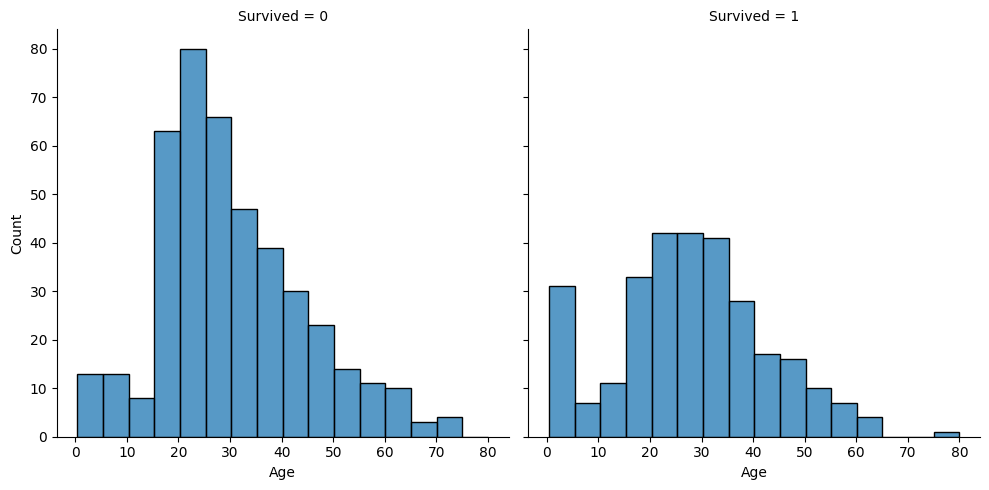

In [70]:
sns.displot(train_df, x='Age', col='Survived', binwidth=5, height=5)

In [71]:
train_df['AgeCut'] = pd.qcut(train_df['Age'], 8, labels=[0, 1, 2, 3, 4, 5, 6, 7])
test_df['AgeCut'] = pd.qcut(test_df['Age'], 8, labels=[0, 1, 2, 3, 4, 5, 6, 7])

In [72]:
train_df.groupby(by=['AgeCut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-703458827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(by=['AgeCut'], as_index=False)['Survived'].mean()


,AgeCut,Survived
0,0,0.550000
1,1,0.341772
2,2,0.367347
3,3,0.352941
4,4,0.416667
5,5,0.450549
6,6,0.329545
7,7,0.415730


In [73]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,AgeCut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,5
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Alone,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Alone,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Medium,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Small,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Small,0


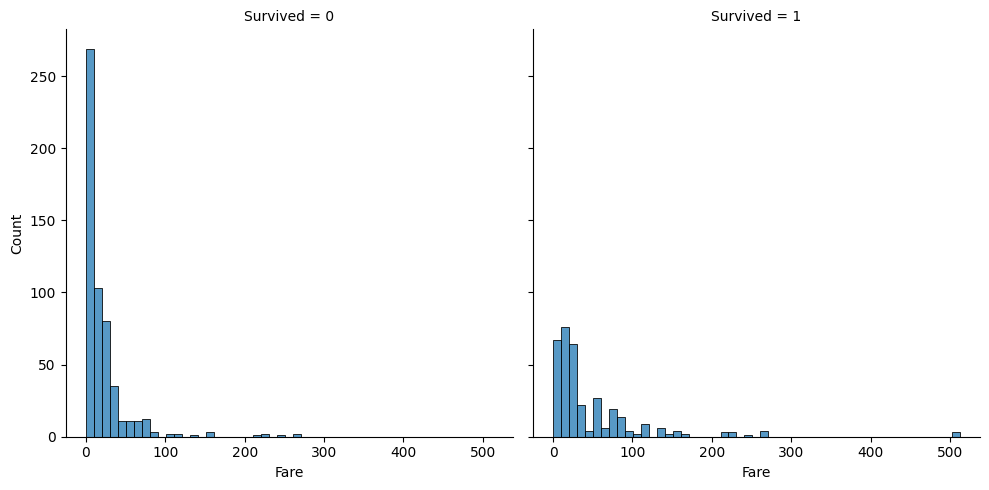

In [74]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=10, height=5)

In [75]:
train_df['FareCut'] = pd.qcut(train_df['Fare'], 6, labels=[0, 1, 2, 3, 4, 5])
test_df['FareCut'] = pd.qcut(test_df['Fare'], 6, labels=[0, 1, 2, 3, 4, 5])

In [76]:
train_df.groupby(by=['FareCut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-2778490274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(by=['FareCut'], as_index=False)['Survived'].mean()


,FareCut,Survived
0,0,0.205128
1,1,0.190789
2,2,0.366906
3,3,0.436242
4,4,0.417808
5,5,0.697987


In [77]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [78]:
train_df['Title'] = train_df['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0].apply(lambda x: x.strip())

In [79]:
train_df.groupby(by=['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [80]:
# military: Capt, Col, Major
# nobility: Jonkheer, the Countess, Don, Lady, Sir
# unmarried female: Ms, Mlle (Mademoiselle), Miss
# married female: Mrs, Mme (Madame)

In [86]:
train_df['Title'] = train_df['Title'].replace({'Capt': 'Military',
                                               'Col': 'Military',
                                               'Major': 'Military',
                                               'Jonkheer': 'Noble',
                                               'the Countess': 'Noble',
                                               'Don': 'Noble',
                                               'Lady': 'Noble',
                                               'Sir': 'Noble',
                                               'Ms': 'Unmarried female',
                                               'Mlle': 'Unmarried female',
                                               'Miss': 'Unmarried female',
                                               'Mme': 'Married female',
                                               'Mrs': 'Married female'})

test_df['Title'] = test_df['Title'].replace({'Capt': 'Military',
                                             'Col': 'Military',
                                             'Major': 'Military',
                                             'Jonkheer': 'Noble',
                                             'the Countess': 'Noble',
                                             'Don': 'Noble',
                                             'Lady': 'Noble',
                                             'Sir': 'Noble',
                                             'Ms': 'Unmarried female',
                                             'Mlle': 'Unmarried female',
                                             'Miss': 'Unmarried female',
                                             'Mme': 'Married female',
                                             'Mrs': 'Married Female'})

In [88]:
train_df.groupby(by=['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Married female,126,0.793651
2,Master,40,0.575000
3,Military,5,0.400000
4,Mr,517,0.156673
5,Noble,5,0.600000
6,Rev,6,0.000000
7,Unmarried female,185,0.702703


In [90]:
train_df['NameLength'] = train_df['Name'].apply(lambda x: len(x))
test_df['NameLength'] = test_df['Name'].apply(lambda x: len(x))

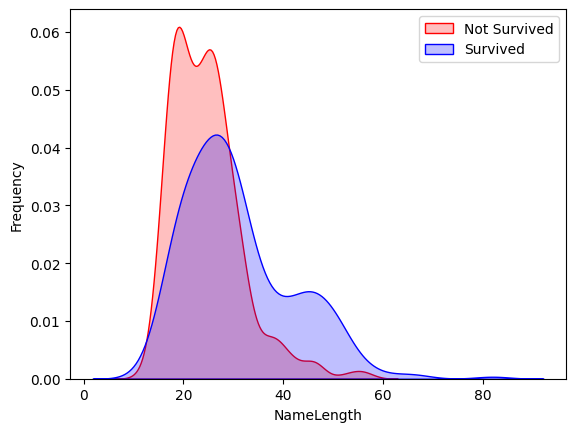

In [92]:
g = sns.kdeplot(train_df['NameLength'][(train_df['Survived']==0) & (train_df['NameLength'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['NameLength'][(train_df['Survived']==1) & (train_df['NameLength'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('NameLength')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [93]:
train_df['NameLengthCut'] = pd.qcut(train_df['NameLength'], 8, labels=[0, 1, 2, 3, 4, 5, 6, 7])
test_df['NameLengthCut'] = pd.qcut(test_df['NameLength'], 8, labels=[0, 1, 2, 3, 4, 5, 6, 7])

In [94]:
train_df.groupby(by=['NameLengthCut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-1705760940.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(by=['NameLengthCut'], as_index=False)['Survived'].mean()


,NameLengthCut,Survived
0,0,0.214286
1,1,0.252427
2,2,0.307692
3,3,0.346939
4,4,0.292929
5,5,0.428571
6,6,0.517241
7,7,0.745283


In [95]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,AgeCut,FareCut,Title,NameLength,NameLengthCut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,2,0,Mr,23,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,5,5,Married female,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,3,1,Unmarried female,22,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,5,5,Married female,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,5,1,Mr,24,3


In [97]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369
